In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Read and clean the data
df = pd.read_csv('csv/prelim csv/gameandgrade.csv')
df.head()


,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83.0
2,0,1,0,0,0,0,1,3,3,80.0
3,0,1,3,5,1,1,2,2,3,45.0
4,1,1,1,1,2,1,1,3,4,85.0


In [372]:
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')
df = df.dropna()

In [373]:
X = df[['Playing Hours', 'Playing Years', 'Playing Often', 'Parent Revenue', 
        'Father Education', 'Mother Education', 'Playing Games']]
Y = df[['Grade']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)


Training Set:
     Playing Hours  Playing Years  Playing Often  Parent Revenue  \
60               0              0              0               3   
623              3              4              4               0   
615              0              0              0               0   
687              1              2              4               2   
760              3              3              3               2   
..             ...            ...            ...             ...   
71               2              1              3               1   
106              0              0              0               2   
270              0              0              0               2   
435              2              3              5               3   
102              1              1              3               3   

     Father Education  Mother Education  Playing Games  
60                  6                 6              0  
623                 5                 5              1 

In [374]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [375]:
coefficient = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print(f"Intercept (b): {model.intercept_[0]:.2f}")
print("\nFeature Coefficients:")
print(coefficient)

Intercept (b): 62.68

Feature Coefficients:
            Feature  Coefficient
0     Playing Hours    -0.521041
1     Playing Years     0.971959
2     Playing Often     2.066015
3    Parent Revenue    -0.878810
4  Father Education     2.135679
5  Mother Education     3.536911
6     Playing Games   -12.439228


In [376]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)


print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 234.94
R² Score: 0.24


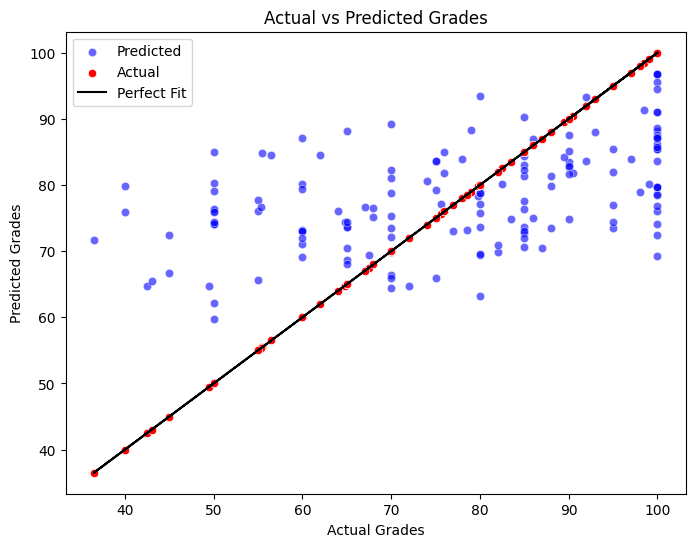

In [377]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="blue", label="Predicted", alpha=0.6)
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="red", label="Actual")
plt.plot(Y_test.values.flatten(), Y_test.values.flatten(), color="black", label="Perfect Fit")

plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.legend()  
plt.show()

In [378]:
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

            Feature  Coefficient
5  Mother Education     3.536911
4  Father Education     2.135679
2     Playing Often     2.066015
1     Playing Years     0.971959
0     Playing Hours    -0.521041
3    Parent Revenue    -0.878810
6     Playing Games   -12.439228


In [379]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, Y_pred)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")

R² Score on Training Data: 0.1851
R² Score on Test Data: 0.2378
